In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [88]:
# load dataset
df = pd.read_csv("spotify_songs.csv")

In [89]:
df.dropna(inplace=True)
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [90]:
from sklearn.preprocessing import LabelEncoder
# preprocessing
label_encoder = LabelEncoder()

df['playlist_genre_encoded'] = label_encoder.fit_transform(df['playlist_genre'])

X= df[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','mode','speechiness','duration_ms','key']] 
y = df['playlist_genre_encoded']


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Determining the best n_estimators.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [104]:
rf = RandomForestClassifier(n_estimators=500, random_state = 42, n_jobs=-1)

In [105]:
rf.fit(X_train, y_train)
# cross validate predict on the training set
forest_train_pred = cross_val_predict(rf, X_train, y_train, cv=3, n_jobs=-1)


# make predictions on the train set
forest_pred = rf.predict(X_test)


In [106]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test)[None, :])
    
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test, np.argmax(pred, axis=1)))

e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
e:\Anaconda\Lib\site-package

Text(0, 0.5, 'accuracy')

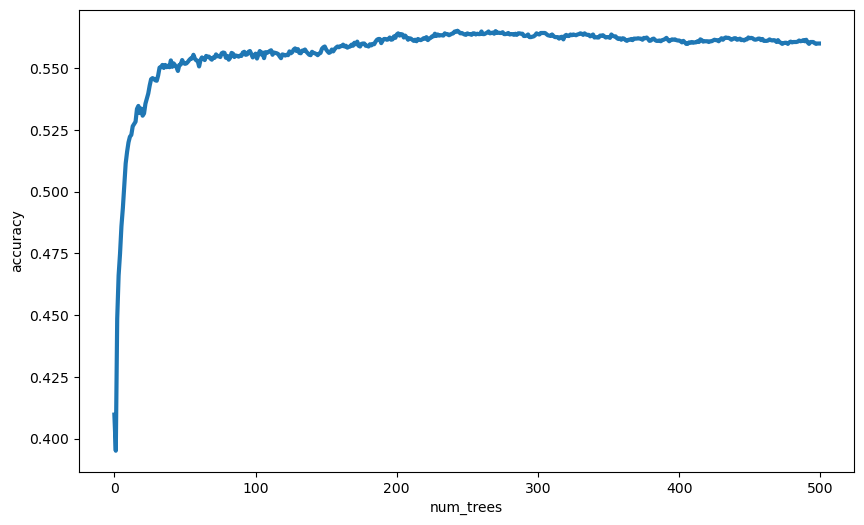

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [138]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='micro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='micro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='micro')) * 100), "%")

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# random forest classifier instance with default params
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [133]:
# set max depth
forest_clf = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state=42, n_jobs=-1)

In [134]:
# running report for set_max depth.
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, n_jobs=-1)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# cross validate predict on the training set
forest_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# first train the model
forest_clf.fit(X_train, y_train)

# make predictions on the train set
forest_pred = forest_clf.predict(X_test)

# print out the classification report
classification_report("Random Forest Classifier Report (Test Set)", y_test, forest_pred)

Random Forest Classifier Report (Test Set) :

Accuracy Score:  49.436 %
     Precision:  49.436 %
        Recall:  49.436 %
      F1 score:  49.436 %


In [154]:
# set number of trees
forest_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

In [155]:
# cross validation on the training set 
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the mean of the cross validation scores
print("Accuracy: ", '{:,.3f}'.format(float(forest_scores.mean()) * 100), "%")

Accuracy:  53.914 %


In [156]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# cross validate predict on the training set
forest_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3, n_jobs=-1)

# print precision and recall scores
print("Precision: ", '{:,.3f}'.format(float(precision_score(y_train, forest_train_pred, average='macro')) * 100), "%")
print("   Recall: ", '{:,.3f}'.format(float(recall_score(y_train, forest_train_pred, average='macro')) * 100), "%")

Precision:  53.034 %
   Recall:  53.873 %


In [157]:
# first train the model
forest_clf.fit(X_train, y_train)


# make predictions on the train set
forest_pred = forest_clf.predict(X_test)

In [158]:
classification_report("Random Forest Classifier Report (Test Set)", y_test, forest_pred)

Random Forest Classifier Report (Test Set) :

Accuracy Score:  56.229 %
     Precision:  56.229 %
        Recall:  56.229 %
      F1 score:  56.229 %
